In [1]:
import hybrid_color as hc
import numpy as np
import matplotlib.pyplot as plt


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
hallo


### Load the first frame of the 5 different point clouds
r1 being the worst and r5 being the best (normally)

In [2]:
# file paths
file_path_1 = 'D:\point clouds\Rafa2_ply_TMC2-randomAc_r1\Rafa2_ply_400K_ctc_r1_006.ply'
file_path_2 = 'D:\point clouds\Rafa2_ply_TMC2-randomAc_r2\Rafa2_ply_400K_ctc_r2_006.ply'
file_path_3 = 'D:\point clouds\Rafa2_ply_TMC2-randomAc_r3\Rafa2_ply_400K_ctc_r3_006.ply'
file_path_4 = 'D:\point clouds\Rafa2_ply_TMC2-randomAc_r4\Rafa2_ply_400K_ctc_r4_006.ply'
file_path_5 = 'D:\point clouds\Rafa2_ply_TMC2-randomAc_r5\Rafa2_ply_400K_ctc_r5_006.ply'

# load point clouds
pc_1 = hc.load_point_cloud(file_path_1)
pc_2 = hc.load_point_cloud(file_path_2)
pc_3 = hc.load_point_cloud(file_path_3)
pc_4 = hc.load_point_cloud(file_path_4)
pc_5 = hc.load_point_cloud(file_path_5)

# load the colors of the point clouds
colors1 = np.asarray(pc_1.colors)
colors2 = np.asarray(pc_2.colors)
colors3 = np.asarray(pc_3.colors)
colors4 = np.asarray(pc_4.colors)
colors5 = np.asarray(pc_5.colors)


### Calculate the histograms for the rgb values

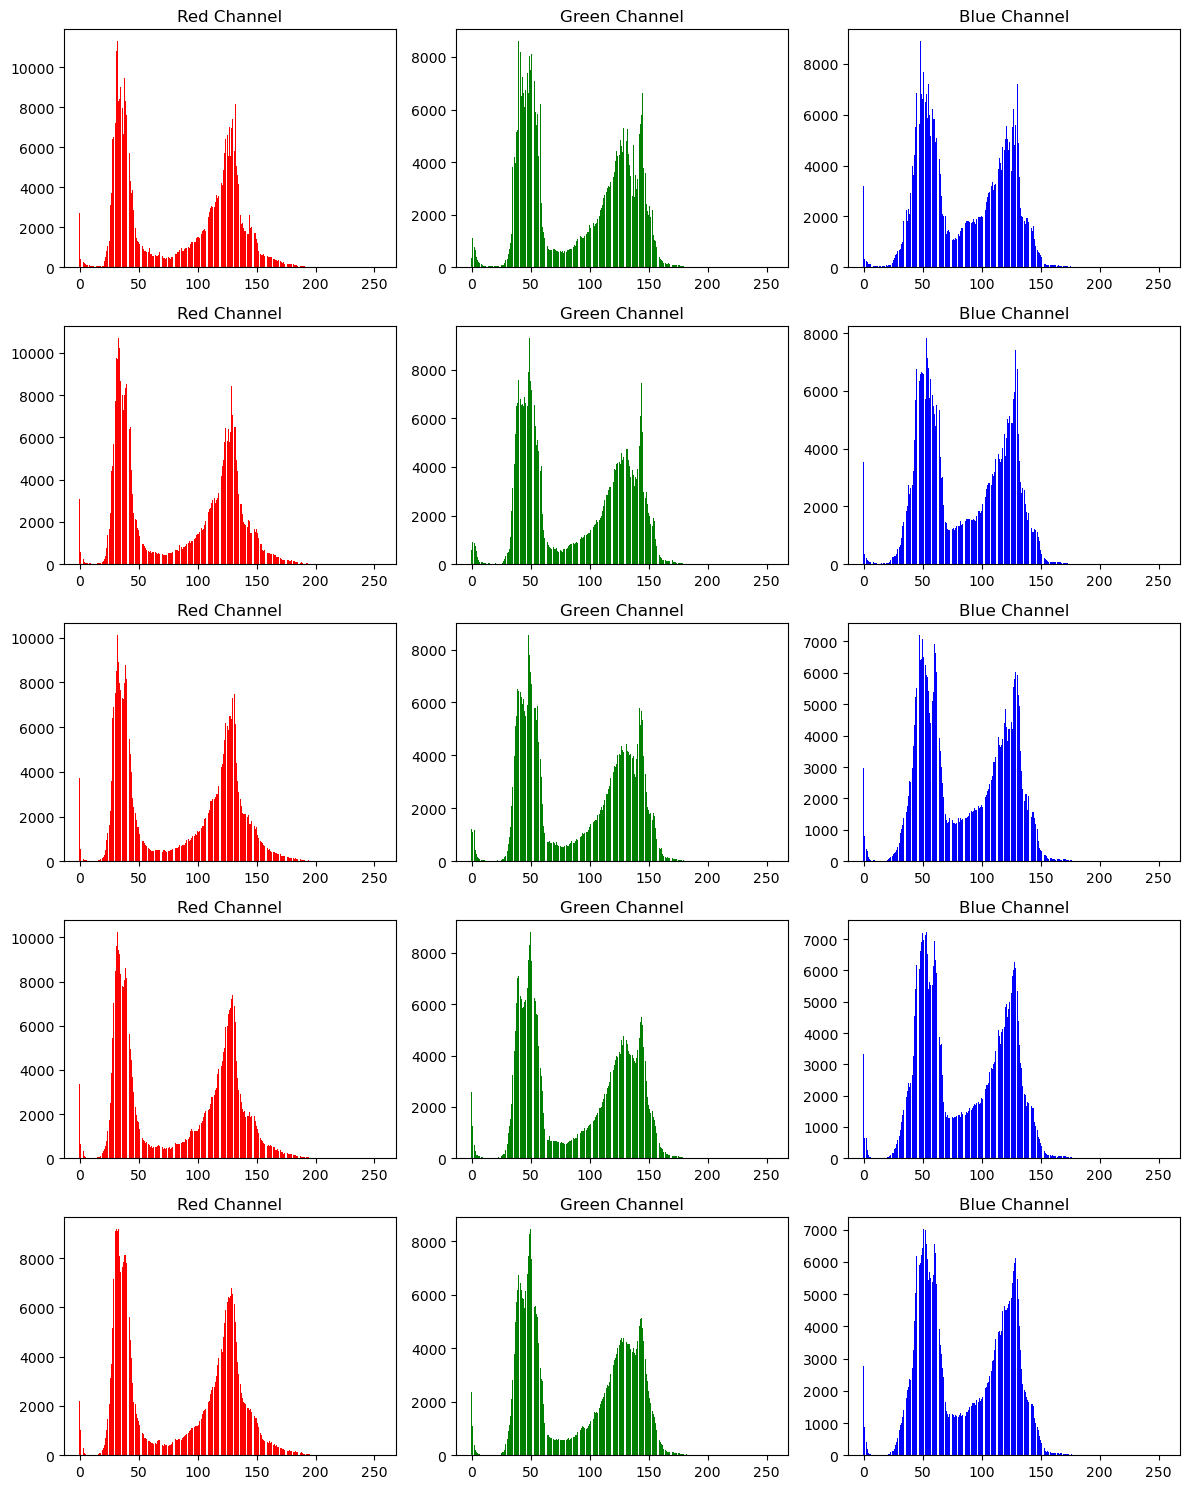

In [3]:
hist_1 = hc.compute_color_histograms(colors1)
hist_2 = hc.compute_color_histograms(colors2)
hist_3 = hc.compute_color_histograms(colors3)
hist_4 = hc.compute_color_histograms(colors4)
hist_5 = hc.compute_color_histograms(colors5)

# Define the number of bins
bins = 256

# Create a 5x3 subplot
fig, axes = plt.subplots(5, 3, figsize=(12, 15))

# Plot histograms for each point cloud
for i, hist in enumerate([hist_1, hist_2, hist_3, hist_4, hist_5]):
    for j, channel in enumerate(['Red', 'Green', 'Blue']):
        # Select the appropriate axis
        ax = axes[i][j]
        # Plot the histogram for the current channel
        ax.bar(np.arange(bins), hist[j], color=channel[0].lower())
        ax.set_title(f'{channel} Channel')



# Adjust layout
plt.tight_layout()
plt.show()


==> entropy

### Color moments 
#### Mean (First Moment)
- **interpretation**: The mean of a color channel represents the average color intensity of that channel across the entire point cloud. A higher mean value indicates a brighter average color, while a lower mean value indicates a darker average color.
- **Relevance**: The mean color can give an indication of the point cloud's overall color "brightness" or "lightness", which might be affected by certain types of distortion such as overexposure or underexposure.


[(0.33025421633773583, 0.18092800139461032, 0.020376069567113526), (0.3516004623825163, 0.1665596852893717, 0.01971344687444205), (0.3316022406203925, 0.14138759441129384, 0.06055280164371291)]


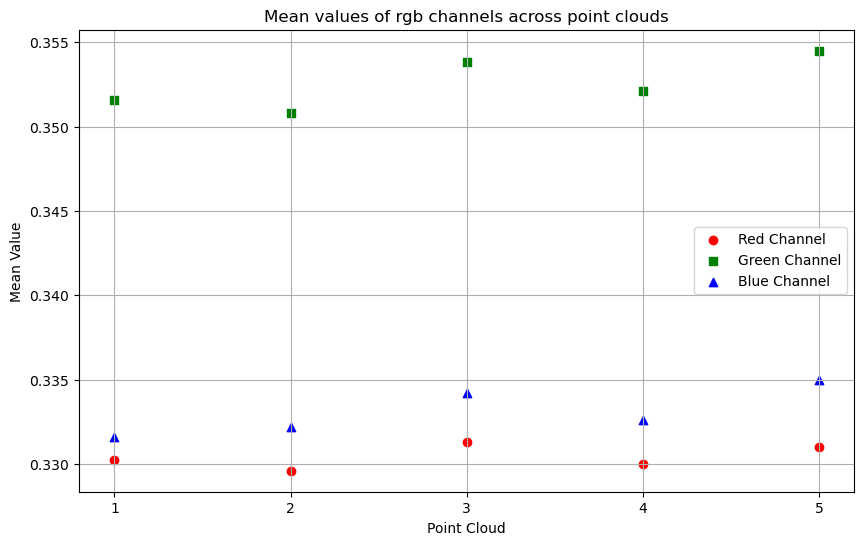

In [6]:
# First extract all the moments for each point cloud
moments1 = hc.compute_color_moments(colors1)
moments2 = hc.compute_color_moments(colors2)
moments3 = hc.compute_color_moments(colors3)
moments4 = hc.compute_color_moments(colors4)
moments5 = hc.compute_color_moments(colors5)
print(moments1)

# plot the first moment (mean) for each point cloud to see the difference
r_means = [moments1[0][0], moments2[0][0], moments3[0][0], moments4[0][0], moments5[0][0]]
g_means = [moments1[1][0], moments2[1][0], moments3[1][0], moments4[1][0], moments5[1][0]]
b_means = [moments1[2][0], moments2[2][0], moments3[2][0], moments4[2][0], moments5[2][0]]

plt.figure(figsize=(10, 6))
plt.scatter(range(1, 6), r_means, c='r', label='Red Channel', marker='o')
plt.scatter(range(1, 6), g_means, c='g', label='Green Channel', marker='s')
plt.scatter(range(1, 6), b_means, c='b', label='Blue Channel', marker='^')

plt.xlabel('Point Cloud')
plt.ylabel('Mean Value')
plt.title('Mean values of rgb channels across point clouds')
plt.legend()
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()


#### Standard Deviation (Second Moment)
 - **Interpretation**: The standard deviation measures the spread of the color intensities around the mean. A high standard deviation means that the color intensities are spread out over a wide range of values, indicating more variability in color. A low standard deviation indicates that the color intensities are clustered closely around the mean, suggesting less variability.
 - **Relevance**: The standard deviation can signal the presence of noise or variations in the point cloud. For instance, a point cloud with a lot of color noise might have a higher standard deviation.


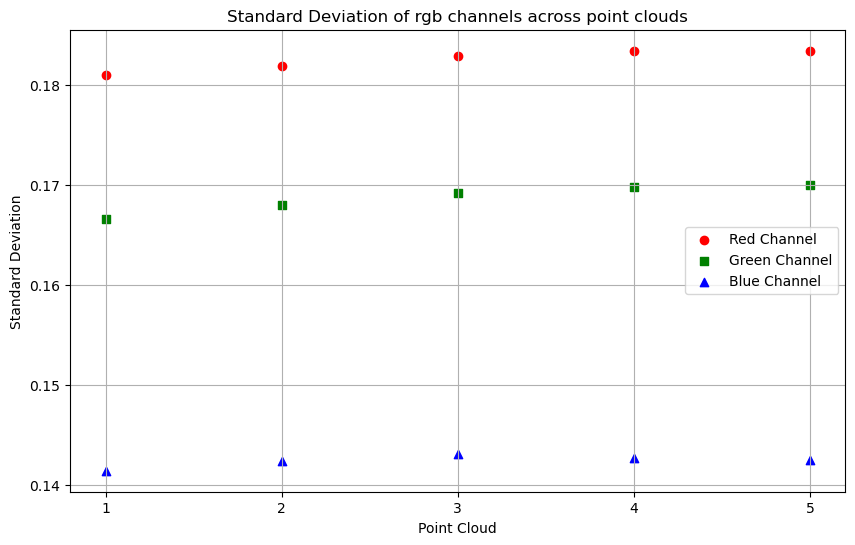

In [7]:
# Secons moment (standard deviation) for each channel
r_std = [moments1[0][1], moments2[0][1], moments3[0][1], moments4[0][1], moments5[0][1]]
g_std = [moments1[1][1], moments2[1][1], moments3[1][1], moments4[1][1], moments5[1][1]]
b_std = [moments1[2][1], moments2[2][1], moments3[2][1], moments4[2][1], moments5[2][1]]

# plot the second moment (standard deviation) for each point cloud to see the difference
plt.figure(figsize=(10, 6))
plt.scatter(range(1, 6), r_std, c='r', label='Red Channel', marker='o')
plt.scatter(range(1, 6), g_std, c='g', label='Green Channel', marker='s')
plt.scatter(range(1, 6), b_std, c='b', label='Blue Channel', marker='^')

plt.xlabel('Point Cloud')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of rgb channels across point clouds')
plt.legend()
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()


#### Skewness (Third Moment)
- **Interpretation**: Skewness measures the asymmetry of the color distribution. A positive skew indicates that the tail on the right side of the color histogram (higher intensity values) is longer or fatter than the left side. A negative skew means the opposite, with a longer or fatter tail on the left side (lower intensity values).
- **Relevance**: Skewness can indicates biases in color distribution. For example, a point cloud that has been darkened due to compression artifacts might have a negatively skewed color distribution.

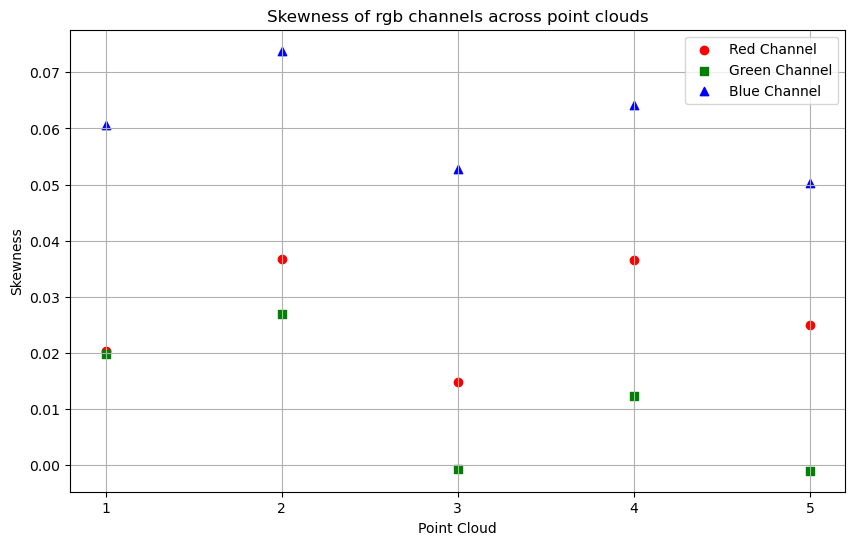

In [8]:
# Third moment (skewness) for each channel
r_skew = [moments1[0][2], moments2[0][2], moments3[0][2], moments4[0][2], moments5[0][2]]
g_skew = [moments1[1][2], moments2[1][2], moments3[1][2], moments4[1][2], moments5[1][2]]
b_skew = [moments1[2][2], moments2[2][2], moments3[2][2], moments4[2][2], moments5[2][2]]

# plot the third moment (skewness) for each point cloud to see the difference
plt.figure(figsize=(10, 6))
plt.scatter(range(1, 6), r_skew, c='r', label='Red Channel', marker='o')
plt.scatter(range(1, 6), g_skew, c='g', label='Green Channel', marker='s')
plt.scatter(range(1, 6), b_skew, c='b', label='Blue Channel', marker='^')

plt.xlabel('Point Cloud')
plt.ylabel('Skewness')
plt.title('Skewness of rgb channels across point clouds')
plt.legend()
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()
